In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import BoxLeastSquares
import scipy.signal
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from lightkurve import search_lightcurve
import courseworkb
import importlib

# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)


<module 'courseworkb' from '/home/olivermcevoy/AstroCourseworkB/courseworkb.py'>

In [2]:
target =  'Kepler-11'
kepler_dataframe, stellar_data = courseworkb.fetch_kepler_data_and_stellar_info_normalise_entire_curve(target)


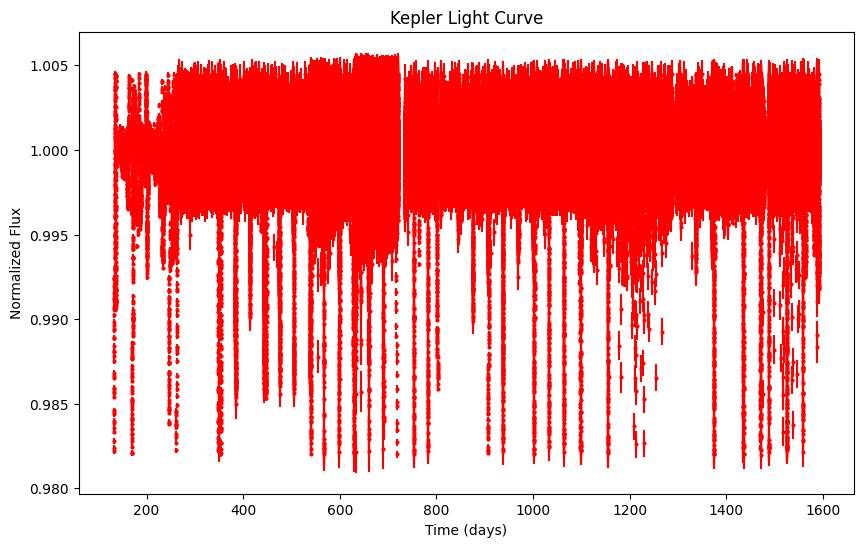

In [3]:
courseworkb.plot_light_curve(kepler_dataframe['time'], kepler_dataframe['flux'], kepler_dataframe['error'])

Running Lomb-Scargle Periodogram Analysis...


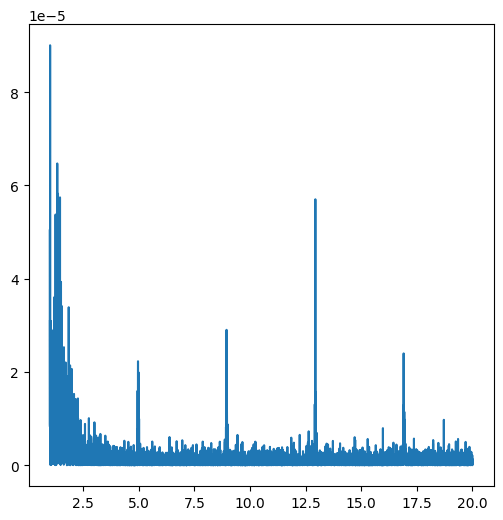

computing second periodogram
Gradient Threshold: 5.84e-09, Second Derivative Threshold: 1.66e-06


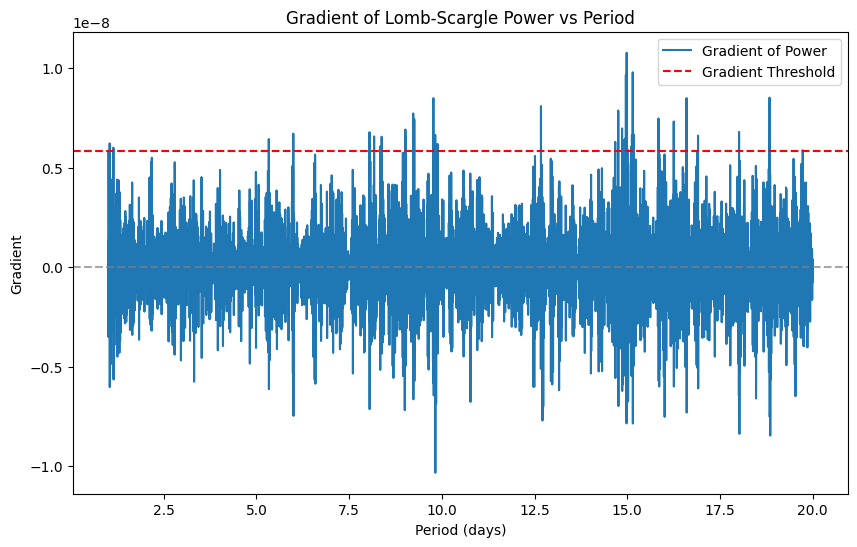

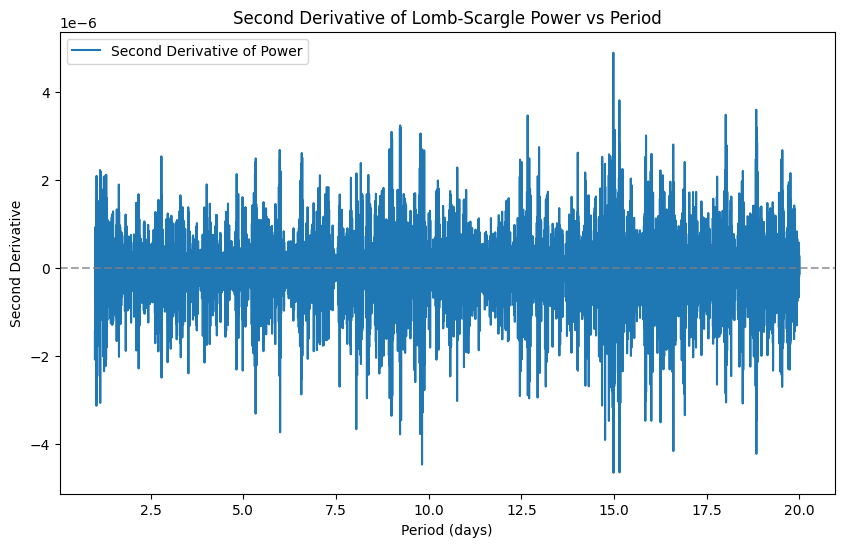

Excluding peaks before period = 1.01 days
Lomb-Scargle Periodogram analysis done


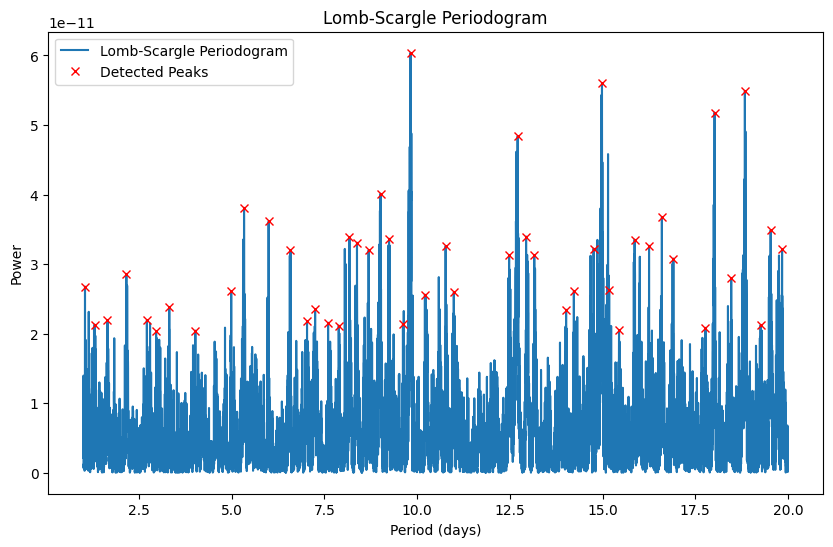

Running Lomb-Scargle Periodogram Analysis...


In [13]:
period_range_zoom =(1,20)
peaks_of_lightcurve_zoom = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=10000, period_range=period_range_zoom)

period_range_regular = (20,120)
peaks_of_lightcurve = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=10000, period_range=period_range_regular)

# add 2 sets of peak to the same array
peaks_of_lightcurve = np.concatenate((peaks_of_lightcurve_zoom,peaks_of_lightcurve),axis=0)

In [10]:
print(len(peaks_of_lightcurve))
peaks_of_lightcurve_filt = courseworkb.remove_exact_duplicates(peaks_of_lightcurve,0.05, False)
print(len(peaks_of_lightcurve_filt))


results_list_no_filter = courseworkb.analyze_peaks_with_bls(
      kepler_dataframe["time"].values,
      kepler_dataframe["flux"].values,
      kepler_dataframe["error"].values,
      peaks_of_lightcurve_filt,
      5000
)





107
Adding period 21.270 days to the unique results.
Adding period 23.210 days to the unique results.
Adding period 27.301 days to the unique results.
Adding period 32.541 days to the unique results.
Adding period 34.481 days to the unique results.
Adding period 36.942 days to the unique results.
Adding period 39.032 days to the unique results.
Adding period 41.812 days to the unique results.
Adding period 44.652 days to the unique results.
Adding period 46.893 days to the unique results.
Adding period 49.843 days to the unique results.
Adding period 52.683 days to the unique results.
Adding period 56.104 days to the unique results.
Adding period 60.574 days to the unique results.
Adding period 66.715 days to the unique results.
Adding period 73.265 days to the unique results.
Adding period 81.796 days to the unique results.
Adding period 88.387 days to the unique results.
Adding period 100.378 days to the unique results.
Adding period 106.999 days to the unique results.
Adding period 

In [12]:


print(f"Number of peaks found: {len(results_list_no_filter)}")

results_list = courseworkb.remove_duplicate_periods(results_list_no_filter,0.1,0.5, 0.75)

print(f"Number of peaks found after removing duplicates: {len(results_list)}")


Number of peaks found: 0
Number of peaks found after removing duplicates: 0


IndexError: list index out of range

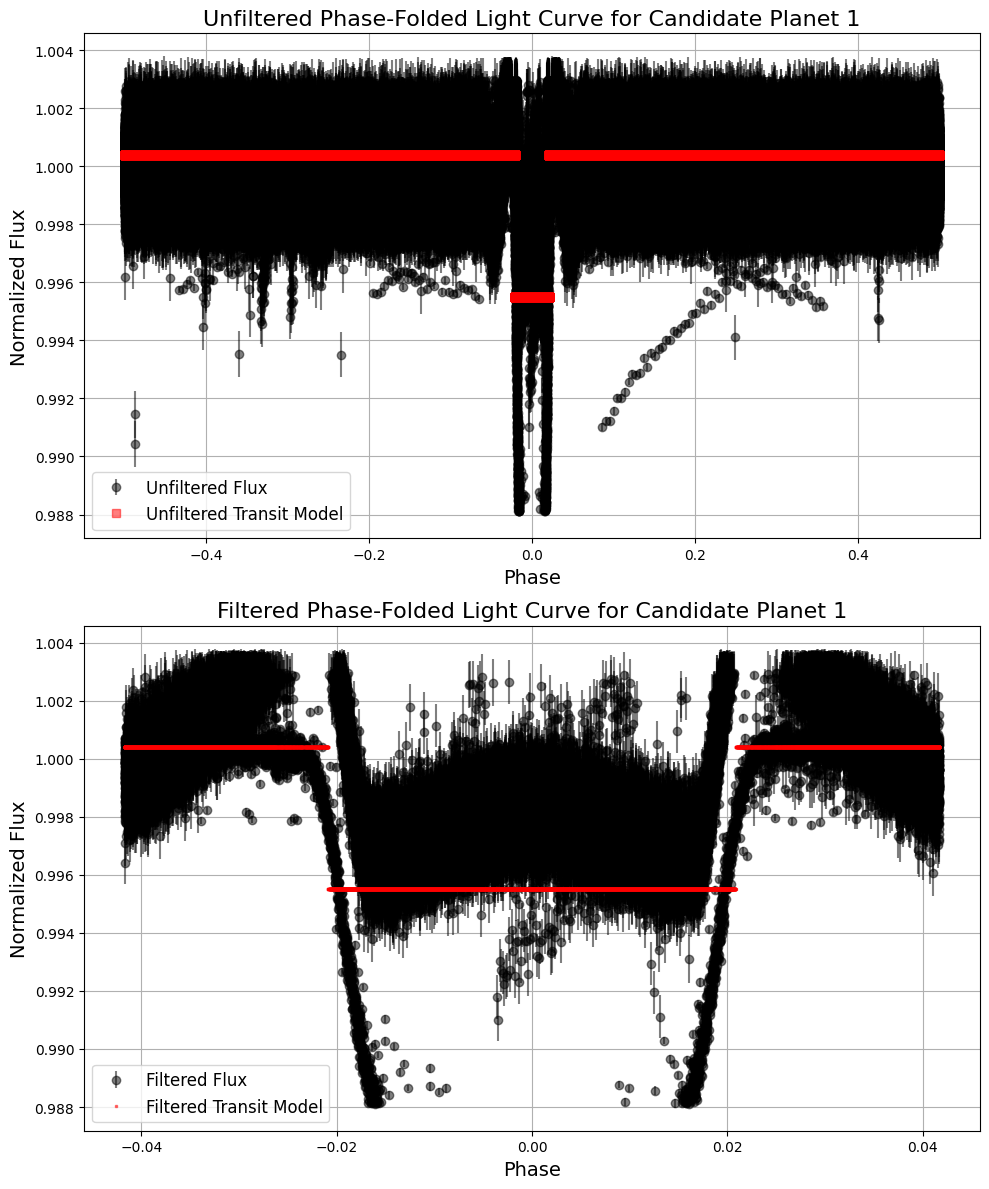

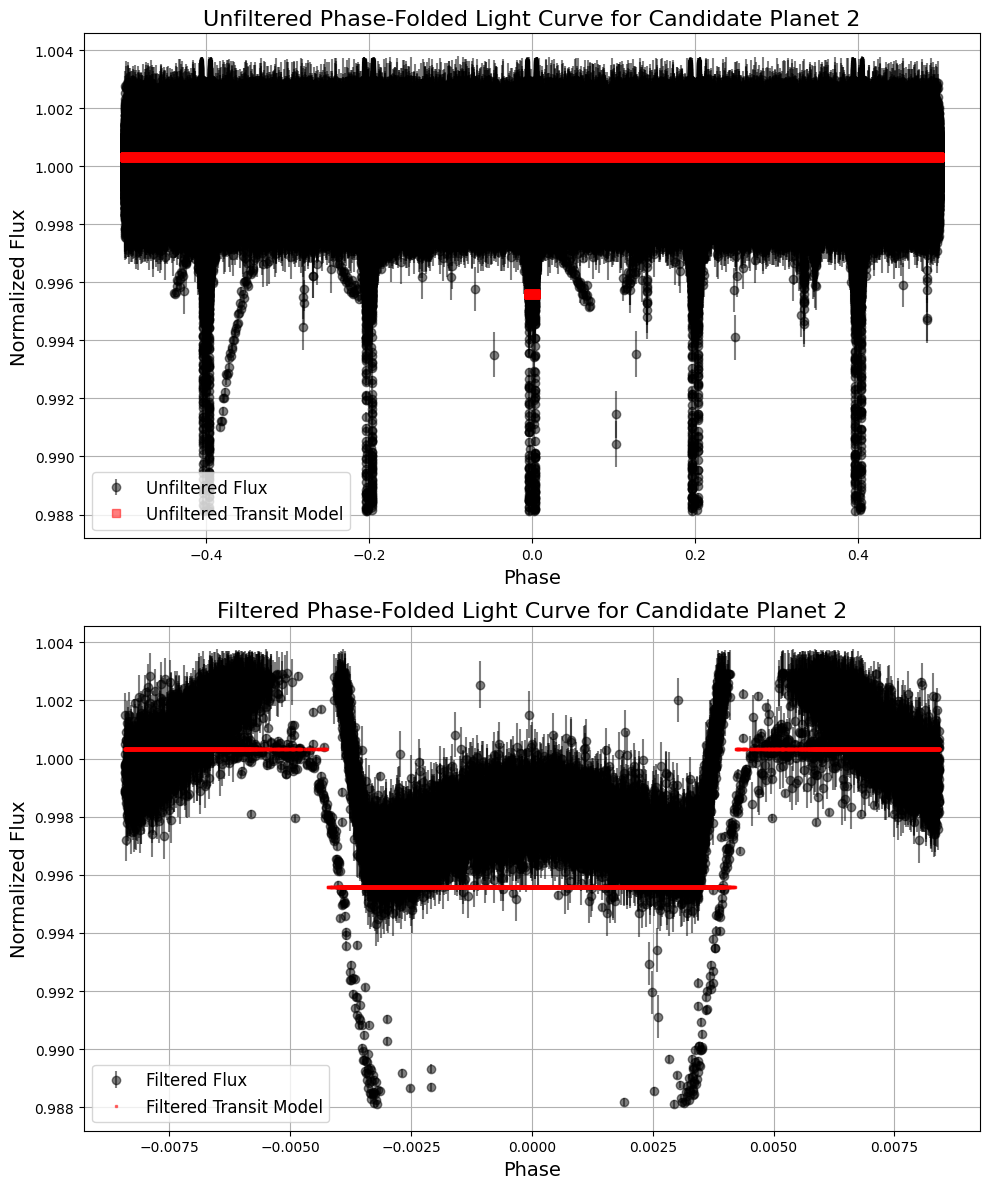

In [17]:
# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)
courseworkb.plot_phase_folded_light_curves(kepler_dataframe,results_list )

In [18]:
courseworkb.summarize_results(results_list,stellar_data)



Detected Planet Candidates:
----------------------------------------
Stellar Radius: 1.415 Solar Radii
Stellar Temperature: 5953 K
----------------------------------------

----------------------------------------
Candidate 1:
  Initial Period = 4.44 days
  Refined Period = 4.44 days
  Transit Depth  = 4.89e-03
  Transit Duration = 0.18 days
  Power = 1507386.41
----------------------------------------
Best Transit Candidate: Period = 4.44 days, Depth = 4.89e-03
Estimated Planet Radius: 0.099 Solar Radii
Estimated Planet Radius: 10.794 Earth Radii
Estimated Planet Radius: 0.985 Jupiter Radii

----------------------------------------
Candidate 2:
  Initial Period = 22.19 days
  Refined Period = 22.19 days
  Transit Depth  = 4.72e-03
  Transit Duration = 0.19 days
  Power = 298435.23
----------------------------------------
Best Transit Candidate: Period = 22.19 days, Depth = 4.72e-03
Estimated Planet Radius: 0.097 Solar Radii
Estimated Planet Radius: 10.608 Earth Radii
Estimated Planet